In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)

## Trees and Random Forest
- Review of trees from Harvard CS109 - https://github.com/cs109/a-2017/blob/master/Labs/Lab9_DT_RF_Boosting/RF_and_Boosting.ipynb
- 

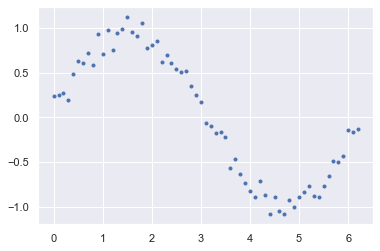

In [135]:
from sklearn.tree import DecisionTreeRegressor
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x) + 0.1*np.random.normal(size = x.shape[0])

plt.plot(x,y, '.');

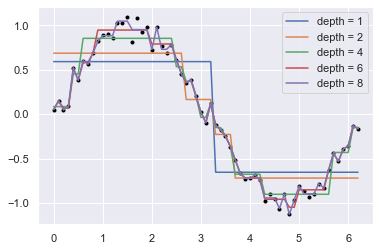

In [71]:
# max depth
plt.plot(x,y, '.', color = 'black')
xx = x.reshape(-1,1) # reshape to (1xn) matrix

for i in [1,2,4,6,8]:
    dtsin = DecisionTreeRegressor(max_depth = i)
    dtsin.fit(xx,y)
    plt.plot(x, dtsin.predict(xx), label = 'depth = ' + str(i))

plt.legend();

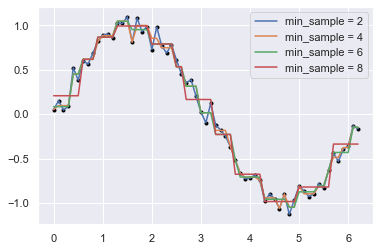

In [75]:
# Min samples to split
plt.plot(x,y, '.', color = 'black')
xx = x.reshape(-1,1) # reshape to (1xn) matrix

for i in [2,4,6,8]:
    dtsin = DecisionTreeRegressor(min_samples_split = i)
    dtsin.fit(xx,y)
    plt.plot(x, dtsin.predict(xx), label = 'min_sample = ' + str(i))

plt.legend();

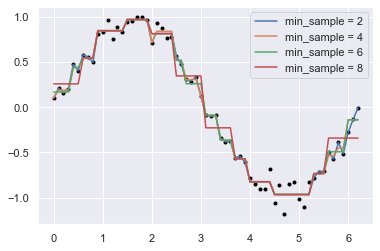

In [80]:
# Max depth and minimum samples to split
plt.plot(x,y, '.', color = 'black')
xx = x.reshape(-1,1) # reshape to (1xn) matrix

for i in [2,4,6,8]:
    dtsin = DecisionTreeRegressor(max_depth = 6, min_samples_split = i)
    dtsin.fit(xx,y)
    plt.plot(x, dtsin.predict(xx), label = 'min_sample = ' + str(i))

plt.legend();

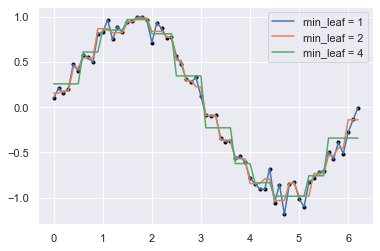

In [83]:
# Min number of samples in the leaf
plt.plot(x,y, '.', color = 'black')
xx = x.reshape(-1,1) # reshape to (1xn) matrix

for i in [1,2,4]:
    dtsin = DecisionTreeRegressor(min_samples_leaf = i)
    dtsin.fit(xx,y)
    plt.plot(x, dtsin.predict(xx), label = 'min_leaf = ' + str(i))

plt.legend();

###  Random Forest

In [5]:
# Function that chooses n samples with replacement from an array
z = np.arange(0,10,0.5)

# Pick indices with replacement
np.random.choice(range(z.shape[0]), replace = True, size = z.shape[0])

# Pick values with replacement
#np.random.choice(z, replace = True, size = z.shape[0])

array([ 6, 14, 10, 10,  4,  7, 16, 13,  6, 17,  6,  3,  4,  2,  3, 16,  2,
        7, 14,  1])

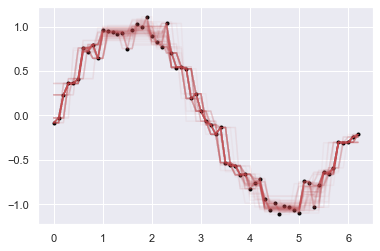

In [127]:
# Run 100 trees by picking the (x,y) with replacement
# Since x has only one column, you always have one predictor... 
# For RF, you need many predictors from which you can choose a subset


plt.plot(x,y, '.', color=  'black')

for i in range(100):
    dtsin = DecisionTreeRegressor(max_depth = 6)
    isamp = np.random.choice(range(x.shape[0]), replace = True, size = x.shape[0])
    xx = x[isamp].reshape(-1,1) # these values are with replacement
    dtsin.fit(xx, y[isamp]) # y values correspond to the indices which were picked with replacement
    plt.plot(x, dtsin.predict(x.reshape(-1,1)), 'r', alpha = 0.05)



###  California Housing price data

In [184]:
from sklearn.datasets import fetch_california_housing

cal_housing = fetch_california_housing()

cal_housing['feature_names']
names = cal_housing.feature_names # column names

df = pd.DataFrame(data = cal_housing.data, columns = names)

df['MedHouseVal'] = cal_housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


(16512,)

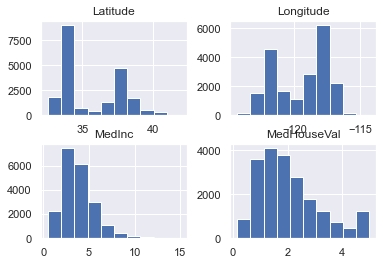

In [198]:
# Create train and test sets
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop('MedHouseVal', axis = 1), 
                                                df['MedHouseVal'], 
                                                test_size = 0.2)

#Xtrain
#Xtest
#ytrain
#ytest

df.hist(['Latitude', 'Longitude', 'MedInc', 'MedHouseVal']);


In [218]:
from sklearn.ensemble import RandomForestRegressor
# code from Adventures in scikit-learn's Random Forest by Gregory Saunders
from itertools import product
from collections import OrderedDict

param_dict = OrderedDict(
    n_estimators = [400, 600, 800],
    max_features = [0.2, 0.4, 0.6, 0.8]
)

param_dict.values()

odict_values([[400, 600, 800], [0.2, 0.4, 0.6, 0.8]])

If ```max_features``` is integer, then that is number of variable used <br>
If ```max_features``` is float (f), then number of variables = ```round(f * total features)```

```params``` is a dictionary with values of the number of trees to fit and the number of features to be used. The fuction ```product(*param_dict.values()``` gives all combinations of the # trees and # features.

In [223]:
results = {}
estimators = {}


for n,f in product(*param_dict.values()):
    params = (n,f)
    est = RandomForestRegressor(oob_score = True, # uses out of bag samples for CV
                               n_estimators = n,  # number of trees to fit
                               max_features = f,  # number of features to use
                               n_jobs = -1        # parallel processing.. uses all CPU cores    
                               )
    est.fit(Xtrain, ytrain)
    results[params] = est.oob_score_
    estimators[params] = est   


In [233]:
display(results)
outparams = max(results, key = results.get)
print("Max oob score: ", outparams)

{(400, 0.2): 0.7906551277613483,
 (400, 0.4): 0.8216247227836085,
 (400, 0.6): 0.816658781426972,
 (400, 0.8): 0.8118084710751388,
 (600, 0.2): 0.7921030438474815,
 (600, 0.4): 0.8215899478035716,
 (600, 0.6): 0.818469073038238,
 (600, 0.8): 0.8138141818117652,
 (800, 0.2): 0.7918679743386929,
 (800, 0.4): 0.8217727595055899,
 (800, 0.6): 0.8180375700290619,
 (800, 0.8): 0.8137562456547066}

Max oob score:  (800, 0.4)


In [339]:
# This gets the RandomForestRegressor parameters that yielded the highest oob_score
rf1 = estimators[outparams]

# Run it on the test set to get the R2 value
print("R2 = ", rf1.score(Xtest, ytest))

from sklearn.metrics import mean_absolute_error
print("MAE = ", mean_absolute_error(ytest, rf1.predict(Xtest)))

from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, rf1.predict(Xtest))

# checking the dimensions of the predcited and ytest array
display(rf1.predict(Xtest).shape , ytest.shape)



R2 =  0.8251104269651884
MAE =  0.31894296615794393


(4128,)

(4128,)

<AxesSubplot:>

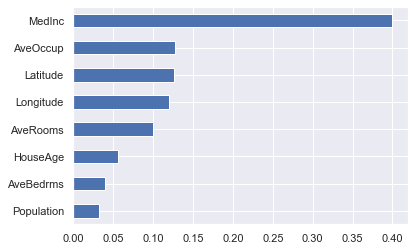

In [273]:
#pd.Series(rf1.feature_importances_, index = names)

rf1_imp = pd.Series(rf1.feature_importances_, index=names)
rf1_imp.sort_values().plot(kind = "barh")

Cross validation using ```GridSearchCV``` <br>
Use only one set of trees since it takes a while to do CV
https://stackoverflow.com/questions/38151615/specific-cross-validation-with-random-forest

In [275]:
param_dict2 = OrderedDict(n_estimators = [600],
                          max_features = [0.2, 0.4, 0.6] )


from sklearn.model_selection import GridSearchCV

est2 = RandomForestRegressor(oob_score=False)
gs = GridSearchCV(est2, param_grid = param_dict2, cv=3, n_jobs=-1)
gs.fit(Xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=OrderedDict([('n_estimators', [600]),
                                     ('max_features', [0.2, 0.4, 0.6])]))

In [291]:
print("best estimator", gs.best_estimator_)
print("best R2: ", gs.best_score_)
print("best parameters:", gs.best_params_)

best estimator RandomForestRegressor(max_features=0.4, n_estimators=600)
best R2:  0.8098927974920094
best parameters: {'max_features': 0.4, 'n_estimators': 600}


In [298]:
# display the results of the cross validation... this is a dictionary with various results
gs.cv_results_

{'mean_fit_time': array([13.57898792, 23.86879142, 28.1854109 ]),
 'std_fit_time': array([0.02559614, 0.0098176 , 0.13687318]),
 'mean_score_time': array([1.01878492, 0.86573331, 0.73003538]),
 'std_score_time': array([0.00939069, 0.00740982, 0.00407188]),
 'param_max_features': masked_array(data=[0.2, 0.4, 0.6],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[600, 600, 600],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 0.2, 'n_estimators': 600},
  {'max_features': 0.4, 'n_estimators': 600},
  {'max_features': 0.6, 'n_estimators': 600}],
 'split0_test_score': array([0.77742435, 0.80641737, 0.80207825]),
 'split1_test_score': array([0.77993481, 0.81100341, 0.80694142]),
 'split2_test_score': array([0.7810596 , 0.81225761, 0.80727023]),
 'mean_test_score': array([0.77947292, 0.8098928 , 0.80542997]),
 'std_test_score': array

In [299]:
# access one of the results
gs.cv_results_['mean_test_score']

array([0.77947292, 0.8098928 , 0.80542997])

### Error as function of number of trees
from http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

In [342]:


# number of features (or variables) to consider
feats = param_dict['max_features']
 
error_rate = OrderedDict((label, []) for label in feats)

# Range of `n_estimators` values to explore.
min_estimators = 200
step_estimators = 200
num_steps = 3
max_estimators = min_estimators + step_estimators*num_steps

for label in feats:
    for i in range(min_estimators, max_estimators+1, step_estimators):
        clf = RandomForestRegressor(oob_score=True, max_features=label)
        clf.set_params(n_estimators=i)
        clf.fit(Xtrain, ytrain)
        print("feats = ", label, " ", "# tree = ", i)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))


feats =  0.2   # tree =  200
feats =  0.2   # tree =  400
feats =  0.2   # tree =  600
feats =  0.2   # tree =  800
feats =  0.4   # tree =  200
feats =  0.4   # tree =  400
feats =  0.4   # tree =  600
feats =  0.4   # tree =  800
feats =  0.6   # tree =  200
feats =  0.6   # tree =  400
feats =  0.6   # tree =  600
feats =  0.6   # tree =  800
feats =  0.8   # tree =  200
feats =  0.8   # tree =  400
feats =  0.8   # tree =  600
feats =  0.8   # tree =  800


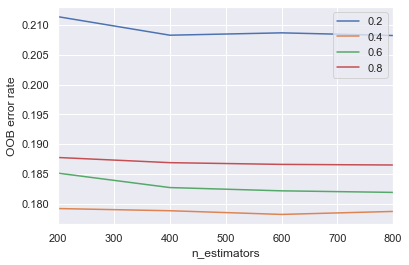

In [343]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

NameError: name 'make_hastie_10_2' is not defined